Аренда велосипедов.

Есть данные за два года: с 4 января 2015 по 3 января 2017. Нужно изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.

Описание данных

    timestamp – дата и время (точность до часа)
    cnt – количество аренд велосипедов за этот час
    t1 – температура, в С
    t2 – температура "ощущается как", в С 
    hum – влажность (%)
    wind_speed – скорость ветра, км/ч
    weather_code – погодные условия:
    1 – ясно (SKC)
    2 – преимущественно ясно / встречаются отдельные облака (SCT)
    3 – облачно / значительные облака (BKN)
    4 – пасмурно (OVC)
    7 – небольшой дождь Rain/ light Rain shower/ Light rain 
    10 – дождь с грозой
    26 – снегопад 
    94 – ледяной туман (да, такое бывает!)
    isholiday – является ли день праздником (1 – праздник, 0 – нет)
    isweekend –  является ли день выходным (1 – выходной, 0 – нет)
    season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
bikes = pd.read_csv('london.csv', parse_dates=[0])

In [3]:
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [5]:
bikes.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

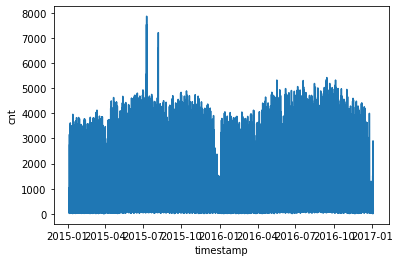

In [6]:
#  график по числу поездок по дате и времени
sns.lineplot(x='timestamp', y='cnt', data=bikes)

In [7]:
bikes.sort_values('timestamp', inplace=True)
bikes.set_index('timestamp', inplace=True)
bikes.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


 Агрегируем число поездок по дням - **resample(rule='D')** и построим график. 

<AxesSubplot:xlabel='timestamp'>

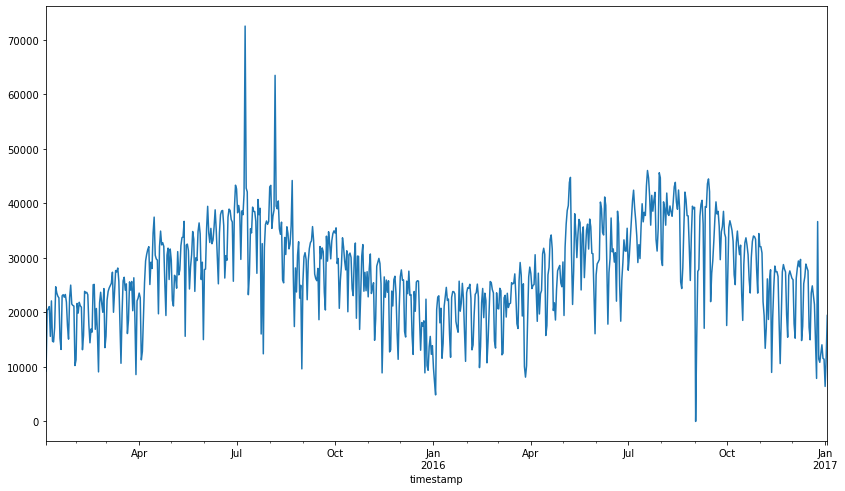

In [8]:
plt.figure(figsize=(14,8))
bikes.resample(rule='D').cnt.sum().plot()

Скользящее среднее с окном 3 (по дням) - **rolling(window=3).mean()**(по дням). cnt 2015-07-09 = ?

In [9]:
bikes.resample(rule='D').cnt.sum().rolling(window=3).mean().reset_index().query('timestamp == "2015-07-09"')

,timestamp,cnt
186,2015-07-09,50705.0


 Cтандартное отклонение:

In [10]:
std_window3 = np.std(bikes.resample(rule='D').cnt.sum().rolling(window=3).mean() - bikes.resample(rule='D').cnt.sum())
# почему такое большое отклонение? хотя...2015-07-09	50705.0 
round(std_window3, 2)

4558.59

Определим границы доверительных интервалов:

    - upper_bound – верхняя граница; к скользящим средним прибавляем 2.576∗std
    - lower_bound – нижняя граница; вычитаем 2.576∗std


In [11]:
bikes_roll_mean = bikes.resample(rule='D').cnt.sum().rolling(window=3).mean().reset_index()
bikes_roll_mean.head()

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,16739.666667
3,2015-01-07,20683.000000
4,2015-01-08,19092.666667


In [12]:
bikes_roll_mean['upper_bound'] = bikes_roll_mean['cnt'] + 2.576 * std_window3
bikes_roll_mean['low_bound'] = bikes_roll_mean['cnt'] - 2.576 * std_window3
bikes_roll_mean.head()

,timestamp,cnt,upper_bound,low_bound
0,2015-01-04,NaN,NaN,NaN
1,2015-01-05,NaN,NaN,NaN
2,2015-01-06,16739.666667,28482.585854,4996.747479
3,2015-01-07,20683.000000,32425.919188,8940.080812
4,2015-01-08,19092.666667,30835.585854,7349.747479


In [13]:
2.576 * std_window3

11742.919187519808

Сравним оригинальные значения cnt с доверительными интервалами.
Есть наблюдения, для которых наблюдаемые **значения** оказались **больше верхней (меньше нижней) границы 99% доверительного интервала**.

In [14]:
bikes_roll_mean.rename(columns={'cnt':'cnt_mean'}, inplace=True)
bikes_roll_mean.head()

,timestamp,cnt_mean,upper_bound,low_bound
0,2015-01-04,NaN,NaN,NaN
1,2015-01-05,NaN,NaN,NaN
2,2015-01-06,16739.666667,28482.585854,4996.747479
3,2015-01-07,20683.000000,32425.919188,8940.080812
4,2015-01-08,19092.666667,30835.585854,7349.747479


In [15]:
b_sum = bikes.resample(rule='D').cnt.sum().reset_index()

In [16]:
# 'добавляем' в одну таблицу скользящие средние по дням и сумму по дням
bikes_roll_mean = bikes_roll_mean. \
                  merge(b_sum, on='timestamp')

In [17]:
bikes_roll_mean.head()

,timestamp,cnt_mean,upper_bound,low_bound,cnt
0,2015-01-04,NaN,NaN,NaN,9234
1,2015-01-05,NaN,NaN,NaN,20372
2,2015-01-06,16739.666667,28482.585854,4996.747479,20613
3,2015-01-07,20683.000000,32425.919188,8940.080812,21064
4,2015-01-08,19092.666667,30835.585854,7349.747479,15601


In [18]:
# наблюдаемые значения оказались больше верхней границы 99% доверительного интервала
bikes_roll_mean.query('cnt > upper_bound')

,timestamp,cnt_mean,upper_bound,low_bound,cnt
186,2015-07-09,50705.000000,62447.919188,38962.080812,72504
214,2015-08-06,46627.333333,58370.252521,34884.414146,63468
609,2016-09-04,14259.000000,26001.919188,2516.080812,27512
721,2016-12-25,19650.666667,31393.585854,7907.747479,36653


Ex.: 2015-07-09 Забастовки в метро London

In [19]:
bikes.query('"2015-07-09 07:00:00" <= timestamp <= "2015-07-09 19:00:00"').style.highlight_max('cnt')

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-07-09 07:00:00,5309,13.500000,13.500000,65.000000,17.000000,1.000000,0.000000,0.000000,1.000000
2015-07-09 08:00:00,7531,14.500000,14.500000,61.000000,19.000000,2.000000,0.000000,0.000000,1.000000
2015-07-09 09:00:00,4832,15.000000,15.000000,59.000000,16.000000,2.000000,0.000000,0.000000,1.000000
2015-07-09 10:00:00,2760,16.500000,16.500000,50.500000,10.000000,2.000000,0.000000,0.000000,1.000000
2015-07-09 11:00:00,2627,18.000000,18.000000,43.000000,8.500000,2.000000,0.000000,0.000000,1.000000
2015-07-09 12:00:00,2778,19.000000,19.000000,40.500000,9.000000,1.000000,0.000000,0.000000,1.000000
2015-07-09 13:00:00,3109,19.500000,19.500000,36.000000,11.000000,1.000000,0.000000,0.000000,1.000000
2015-07-09 14:00:00,3231,21.000000,21.000000,34.000000,10.000000,1.000000,0.000000,0.000000,1.000000
2015-07-09 15:00:00,4076,22.000000,21.000000,30.000000,9.000000,1.000000,0.000000,0.000000,1.000000


In [20]:
# наблюдаемые значения оказались меньше нижней границы 99% доверительного интервала
bikes_roll_mean.query('low_bound > cnt').style.highlight_min('cnt')

,timestamp,cnt_mean,upper_bound,low_bound,cnt
130,2015-05-14 00:00:00,28709.333333,40452.252521,16966.414146,15609
189,2015-07-12 00:00:00,36036.666667,47779.585854,24293.747479,23240
201,2015-07-24 00:00:00,31013.666667,42756.585854,19270.747479,16034
232,2015-08-24 00:00:00,29529.333333,41272.252521,17786.414146,17400
314,2015-11-14 00:00:00,21037.333333,32780.252521,9294.414146,8898
607,2016-09-02 00:00:00,26086.333333,37829.252521,14343.414146,0
615,2016-09-10 00:00:00,31262.000000,43004.919188,19519.080812,17080
621,2016-09-16 00:00:00,36193.333333,47936.252521,24450.414146,21967
678,2016-11-12 00:00:00,20878.000000,32620.919188,9135.080812,8990


607 строка: ошибка данных.

График дневных аренд и ~99% интервалов скользящего среднего за неделю

In [21]:
bikes_roll_mean.set_index('timestamp', inplace=True)

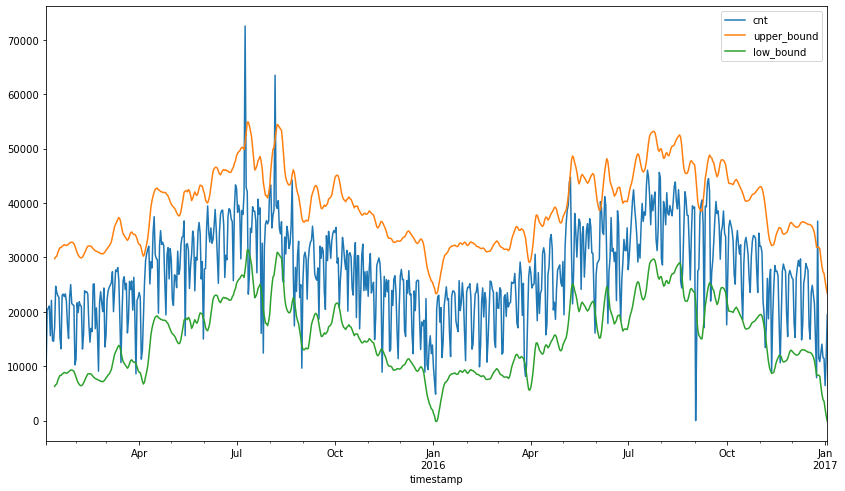

In [22]:
plt.figure(figsize=(14,8))
bikes_roll_mean.cnt.plot()
bikes_roll_mean.upper_bound.rolling(window=7).mean().plot()
bikes_roll_mean.low_bound.rolling(window=7).mean().plot()
plt.legend()